In [273]:
import numpy as np
import pandas as pd
import math
import torch
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv('./EEG_Subject1.csv', header=None)
ydf = pd.read_csv('./Stimulus_Subject1.csv', header=None)
# sample frequency = 128 Hz
# samples per trail = 128 * 5 = 640
x = df.to_numpy()
y = ydf.to_numpy()[0]

In [259]:
N = 641
f = 128

In [260]:
tmp = y[y!=0]
last = 0
for i in range(len(y)):
    if y[i] != y[i-1]:
        size = i-last
        print(size)
        last = i

1029
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
1692
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
1613
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
1788
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
1588
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
3865
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
2019
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
1631
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
1623
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
1542
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
641
767
64

In [261]:
ydf.shape, 80125/641

((1, 187392), 125.0)

# Ploting trial

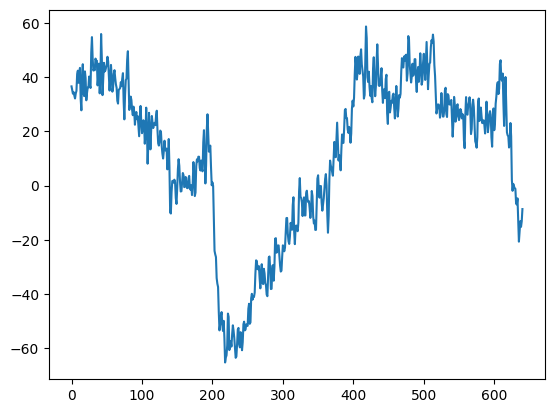

In [262]:
def plot_trial(data: np.ndarray):
    plt.plot(data);

trial = trials[0, 6]
plot_trial(trial)

# Normalize

In [263]:
def normalize(data: np.ndarray) -> np.ndarray:
    normal_O = data.copy()
    means = data.sum(axis=1)/data.shape[1]
    normal_O = (normal_O.transpose() - means).transpose()

    return normal_O

normal_O = normalize(x)
normal_O[:,:5]

array([[ 1.36989745e+01,  2.08829488e+01,  7.54487055e+00,
         1.26774769e+01,  2.65179311e+01],
       [-2.28858151e+01, -1.41699137e+01, -1.82715144e+01,
        -2.49445032e+01, -1.72461142e+01],
       [ 1.13254247e+01,  2.05550022e+01,  5.67870651e+00,
         6.19879898e+00,  2.10668393e+01],
       [-1.04190957e+02, -9.23981387e+01, -9.39418339e+01,
        -7.85554956e+01, -7.49619758e+01],
       [-5.28038771e+01, -6.71615104e+01, -5.22917042e+01,
        -4.51128875e+01, -5.28038771e+01],
       [ 3.02880969e+01,  4.36230626e+01,  2.00310979e+01,
         2.92649981e+01,  4.25999638e+01],
       [ 1.58367039e+01,  9.68710627e+00, -1.03183302e+01,
        -1.18578679e+01, -9.80515099e+00],
       [ 2.63616156e+01,  4.48179461e+01,  2.22573527e+01,
        -4.92160760e+00, -1.00540783e+01],
       [ 2.19524321e+00,  2.62926312e+01,  9.88314982e+00,
        -2.42396118e+00,  5.27202096e+00],
       [ 1.02996140e+01,  2.67096333e+01,  9.27561496e+00,
        -2.00573089e+00

# CAR

In [264]:
def car_filter(data: np.ndarray) -> np.ndarray:
    sum_signals = data.sum(axis=0) / data.shape[0]
    filtered_eeg_data = data.copy() - sum_signals
    return filtered_eeg_data

filtered_data = car_filter(normal_O)
filtered_data[:5]

array([[ 21.24447191,  20.8823545 ,  16.70339313, ...,  33.80951937,
         33.80951937,  33.80951937],
       [-15.3403177 , -14.17050805,  -9.11299181, ...,  51.58044854,
         51.58044854,  51.58044854],
       [ 18.87092219,  20.55440789,  14.83722908, ...,  43.74068728,
         43.74068728,  43.74068728],
       [-96.64545979, -92.39873307, -84.78331129, ...,  51.29935803,
         51.29935803,  51.29935803],
       [-45.25837966, -67.16210475, -43.13318164, ..., -90.64306516,
        -90.64306516, -90.64306516]])

# DFT

In [265]:
def get_dft(data: np.ndarray) -> np.ndarray:
    res = np.absolute(np.fft.fft(data))
    return res

def plot_dft(data: np.ndarray, window=None) -> None:
    res = get_dft(data)
    if window == None:
        plt.plot(res);
    else:
        plt.plot(res[window])

def plot_components(components_val, components=[60,50,42,37,33]):
    plt.scatter(components, components_val, c="r")
    
# 12 -> 60,61
# 10 -> 50, 51
# 8.57 -> 42, 43
# 7.5 -> 37, 38
# 6.66 -> 33, 34

In [266]:
trial_num = 0

(1, 2)

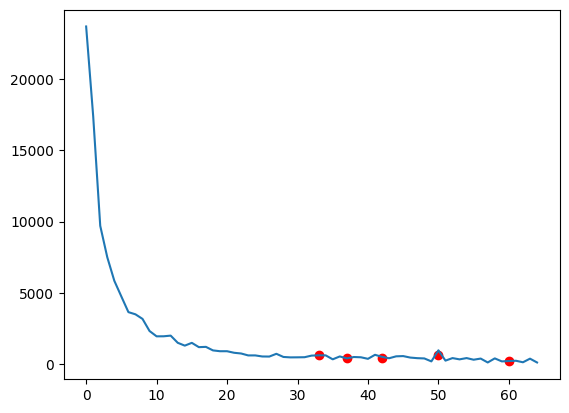

In [267]:
trial_num += 1

# plot_dft(trials[0, 7])
plot_dft(trials[trial_num, 7], slice(0, 65, 1))
plot_components(get_components_val(trials[trial_num,7]))
trial_num, aggregate_y[trial_num]

In [268]:
def get_component(freq, freqs, N=N, sampling_rate=f):
    freq_bins = np.fft.fftfreq(N, d=1/sampling_rate)
    for i in range(len(freq_bins)):
        if freq < freq_bins[i]:
            break
    
    return (freqs[i] + freqs[i-1]) / 2

get_component(12, res_dft, 641)

# 12 -> 60,61
# 10 -> 50, 51
# 8.57 -> 42, 43
# 7.5 -> 37, 38
# 6.66 -> 33, 34

404.66142139505826

In [269]:
def get_components_val(trial, components=[12, 10, 8.57, 7.5, 6.66]):
    freqs = get_dft(trial)
    components_val = []
    for component in components:
        components_val.append(get_component(component, freqs))

    return components_val

def get_highest_val(components_val):    
    return components_val.index(max(components_val))

def estimate_freq(trial, components=[12, 10, 8.57, 7.5, 6.66]):
    components_val = get_components_val(trial, components)
    return get_highest_val(components_val)

estimate_freq(trial)

4

In [270]:
filtered_x = x[:,y!=0]
filtered_y = y[y!=0]
aggregate_y = []
for i in range(125):
    aggregate_y.append(filtered_y[i*641])
aggregate_y = np.array(aggregate_y)

In [271]:
trials = torch.from_numpy(filtered_data[:,y!=0]).unfold(1, 641, 641).permute((1,0,2)).numpy()

res_o1 = []
res_o2 = []
res_avg = []
for i in range(125):
    res_o1.append(estimate_freq(trials[i, 6])) # o1
    res_o2.append(estimate_freq(trials[i, 7])) # o2
    res_avg.append(estimate_freq((trials[i, 6] + trials[i, 7]) / 2)) # o2

res_o1 = np.array(res_o1)
res_o2 = np.array(res_o2)
res_avg = np.array(res_avg)
res_o1 += 1
res_o2 += 1
res_avg += 1
(res_o1 == aggregate_y).sum() / 125, (res_o2 == aggregate_y).sum() / 125, (res_avg == aggregate_y).sum() / 125

(0.544, 0.656, 0.624)

In [302]:
# try using components only instead of all data
for k in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=k)

    res = []
    for i in range(125):
        trials_sub6 = np.append(trials[:i], trials[i+1:], 0)
        y_sub6 = np.append(aggregate_y[:i], aggregate_y[i+1:])
        neigh.fit(trials_sub6[:,7], y_sub6)
        res.append(neigh.predict(trials[[i],6])[0])

    res = np.array(res)
    acc = (res == aggregate_y).sum() / 125
    print(f"{k}: {acc*100}")

1: 22.400000000000002
2: 23.200000000000003
3: 22.400000000000002
4: 23.200000000000003
5: 22.400000000000002
6: 26.400000000000002
7: 21.6
8: 21.6
9: 25.6
10: 24.8
11: 24.8
12: 23.200000000000003
13: 24.0
14: 24.8
15: 24.8
16: 24.0
17: 24.8
18: 25.6
19: 26.400000000000002
20: 26.400000000000002
21: 24.8
22: 24.0
23: 24.0
24: 23.200000000000003
25: 24.8
26: 22.400000000000002
27: 22.400000000000002
28: 23.200000000000003
29: 22.400000000000002


In [296]:
i = 5
trials_sub6 = np.append(trials[:i], trials[i+1:], 0)
y_sub6 = np.append(aggregate_y[:i], aggregate_y[i+1:])
neigh.fit(trials_sub6[:,6], y_sub6)
neigh.predict(trials[[i],6])[0]

3